In [1]:
import pandas as pd
import numpy as np

# Prepare data

In [6]:
dataframe = pd.read_csv('data/emotion_sentimen_dataset.csv').drop(columns=['Unnamed: 0'])
dataframe

,text,Emotion
0,i seriously hate one subject to death but now ...,hate
1,im so full of life i feel appalled,neutral
2,i sit here to write i start to dig out my feel...,neutral
3,ive been really angry with r and i feel like a...,anger
4,i feel suspicious if there is no one outside l...,neutral
...,...,...
839550,i feel like telling these horny devils to find...,neutral
839551,i began to realize that when i was feeling agi...,neutral
839552,i feel very curious be why previous early dawn...,neutral
839553,i feel that becuase of the tyranical nature of...,neutral


## Check labels

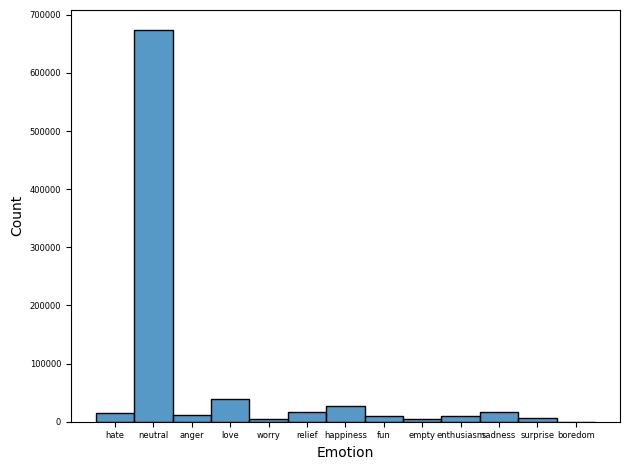

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(dataframe['Emotion'], binwidth=105)
plt.tick_params(labelsize = 6)
plt.tight_layout()
plt.show()

## Label encoding and NLP preprocessing

In [23]:
label_dict = {key: i for i, key in enumerate(dataframe['Emotion'].unique())}
label_dict

{'hate': 0,
 'neutral': 1,
 'anger': 2,
 'love': 3,
 'worry': 4,
 'relief': 5,
 'happiness': 6,
 'fun': 7,
 'empty': 8,
 'enthusiasm': 9,
 'sadness': 10,
 'surprise': 11,
 'boredom': 12}

In [26]:
import nltk

### Noise removal

In [25]:
import re


def remove_noise(text: str) -> str:
    result = re.sub(r'[\.\?\!\,\:\;\"]', '', text)
    result = result.strip()
    result = " ".join(result.split())
    return result

### Tokenization

In [27]:
def tokenization(text: str) -> list[str]:
    return nltk.word_tokenize(text.lower())

### Stop words removal

In [28]:
def remove_stop_words(tokens: list[str]) -> list[str]:
    stopwords = nltk.corpus.stopwords.words("english")
    return [token for token in tokens if token.lower() not in stopwords]

### Stemming

In [29]:
def stemming(tokens: list[str]) -> list[str]:
    stemmer = nltk.stem.PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

### Lemmatization

In [30]:
def lemmatization(tokens: list[str]) -> list[str]:
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

### NLP pipeline

In [31]:
def pipeline(text: str) -> list[str]:
    text = remove_noise(text)
    tokens = tokenization(text)
    tokens = remove_stop_words(tokens)
    stemmed = stemming(tokens)
    lemmatized = lemmatization(stemmed)
    
    return lemmatized


pipeline(dataframe['text'].iloc[0])